# ハンドモデルを作る

In [1]:
exec(open('/choreonoid_ws/install/share/irsl_choreonoid/sample/irsl_import.py').read())

## パラメータ設定

In [7]:
lCol=[0.2, 0.7, 0.2] ## color link
jCol=[0.7, 0.2, 0.2] ## color joint
jR=0.008 # joint radius
jH=0.018 # joint length
tipR=0.01 # tip radius
lR=0.007 # link radius
palm_y=0.132 # palm width
palm_z=0.148 # palm height
palm_t=lR*2  # palm thickness
thumb_l0=0.076 # thumb length0
thumb_l1=0.059 # thumb length1
thumb_l2=0.046 # thumb length2
fg_l0=0.072 # finger length0
fg_l1=0.046 # finger length1
fg_l2=0.041 # finger length2
scale=1.0 # scale of model

スケーリング

In [8]:
jR*=scale
jH*=scale
tipR*=scale
lR*=scale
palm_y*=scale
palm_z*=scale
palm_t*=scale
thumb_l0*=scale
thumb_l1*=scale
thumb_l2*=scale
fg_l0*=scale
fg_l1*=scale
fg_l2*=scale

RobotBuilderを作る

In [9]:
jid=0 ## joint-id
rb=RobotBuilder()

## 手のひら形状を作る

makeLineAlignedShape # start から end を結ぶ直線上に形状を作る

makeSphare # 球をつくる

In [10]:
rb.makeLineAlignedShape(npa([0.,0.,0.]),     npa([0.,0.,palm_z]), size=palm_t/2, shape='Capsule', color=lCol)
rb.makeLineAlignedShape(npa([0.,0.,palm_z]), npa([0.,-palm_y, palm_z]), size=palm_t/2, shape='Capsule', color=lCol)
rb.makeLineAlignedShape(npa([0.,-palm_y,palm_z]), npa([0.,-palm_y,0.]), size=palm_t/2, shape='Capsule', color=lCol)
rb.makeLineAlignedShape(npa([0.,-palm_y,0.]), npa([0.,0.,0.]), size=palm_t/2, shape='Capsule', color=lCol)
rb.makeSphere(tipR, color=jCol).locate(npa([0., 0., 0.]))

Wrap: <coordinates[0x564db29396c0] 0 0 0.074 / 0 0.707107 0.707107 0 > | <cnoid.Util.SgPosTransform object at 0x7ffa8641d8b0>

Wrap: <coordinates[0x564db2939730] 0 -0.066 0.148 / 0 0 1 0 > | <cnoid.Util.SgPosTransform object at 0x7ffa8643b8b0>

Wrap: <coordinates[0x564db29396c0] 0 -0.132 0.074 / -0.707107 0 -0 0.707107 > | <cnoid.Util.SgPosTransform object at 0x7ffa8641d8b0>

Wrap: <coordinates[0x564db2939730] 0 -0.066 0 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7ffa8643bd30>

Wrap: <coordinates[0x564db29396c0] 0 0 0 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7ffa8641d8b0>

In [11]:
rb.draw.viewAll()

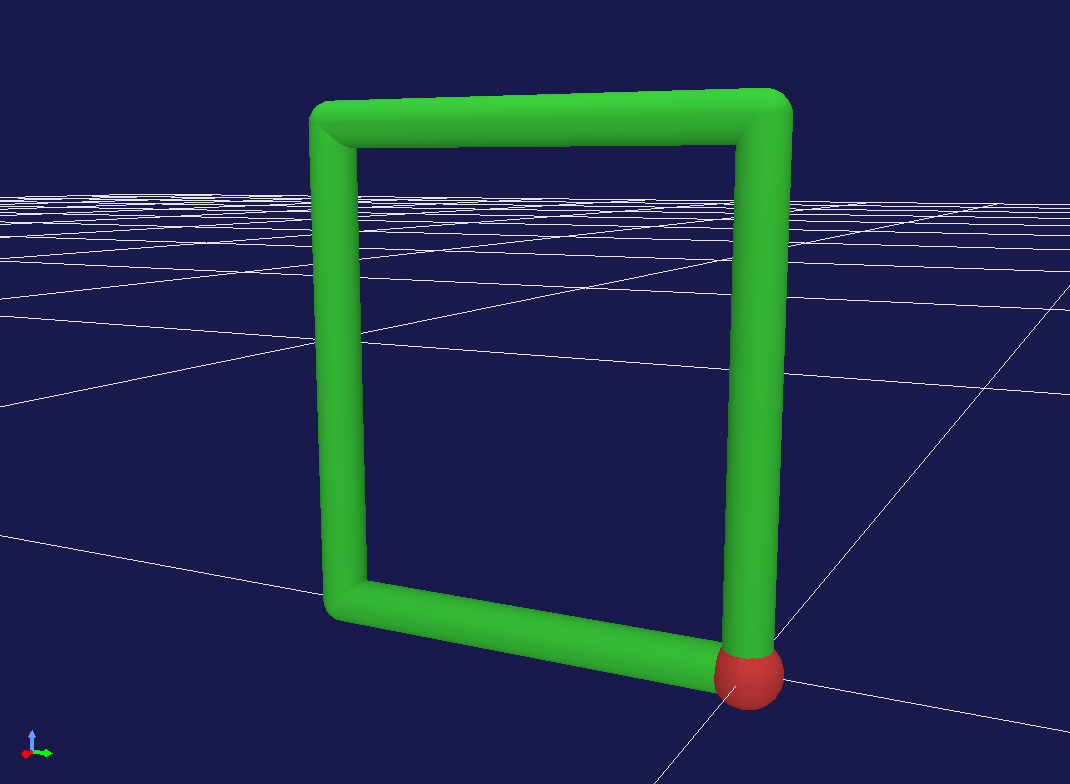

In [12]:
%display

ルートリンクを作る

In [13]:
lcur=rb.createLinkFromShape(name='Root', root=True, density=400.0)
lroot=lcur

## 親指リンクを作る

第１関節

In [14]:
# thumb0-joint
rb.createJointShape(jointType=Link.JointType.RevoluteJoint).rotate(PI/4, coordinates.X).locate(npa([0, -palm_y, 0]), coordinates.wrt.world)
# thumb0-shape
rb.makeCylinder(jR, jH, color=jCol).rotate(PI/4, coordinates.X).locate(npa([0, -palm_y, 0]), coordinates.wrt.world) ## rotate-joint-shape
lcur=rb.createLinkFromShape(name='thumb0', parentLink=lcur, density=400.0, JointId=jid, JointRange=[-PI, PI])
jid += 1

Wrap: <coordinates[0x564db29905f0] 0 -0.132 0 / 0.382683 0 0 0.92388 > | <cnoid.Util.SgPosTransform object at 0x7ffa865a5870>

Wrap: <coordinates[0x564db29396c0] 0 -0.132 0 / 0.382683 0 0 0.92388 > | <cnoid.Util.SgPosTransform object at 0x7ffa8643e9b0>

第２関節

In [15]:
linkDir=npa([0, -math.sqrt(0.5), math.sqrt(0.5)])
# thumb1-joint
rb.createJointShape(jointType=Link.JointType.RevoluteJoint).rotate(-PI/2, coordinates.Z).locate(npa([0, -palm_y, 0]), coordinates.wrt.world)
# thumb1-shape
rb.makeCylinder(jR, jH, color=jCol).rotate(-PI/2, coordinates.Z).locate(npa([0, -palm_y, 0]), coordinates.wrt.world) ## rotate-joint-shape
rb.makeCapsule(lR, thumb_l0-2*lR, color=lCol).rotate(-PI/4, coordinates.X).locate(npa([0, -palm_y, 0]) + thumb_l0/2 * linkDir, coordinates.wrt.world) ## shape-body
lcur=rb.createLinkFromShape(name='thumb1', parentLink=lcur, density=400.0, JointId=jid, JointRange=[-PI, PI])
jid += 1

Wrap: <coordinates[0x564db29904a0] 0 -0.132 0 / 0 0 -0.707107 0.707107 > | <cnoid.Util.SgPosTransform object at 0x7ffa86426270>

Wrap: <coordinates[0x564db29396c0] 0 -0.132 0 / 0 0 -0.707107 0.707107 > | <cnoid.Util.SgPosTransform object at 0x7ffa860dc070>

Wrap: <coordinates[0x564db29904a0] 0 -0.15887 0.0268701 / -0.382683 0 0 0.92388 > | <cnoid.Util.SgPosTransform object at 0x7ffa8659b930>

第３関節

In [16]:
pos=npa([0, -palm_y, 0]) + thumb_l0 * linkDir
# thumb2-joint
rb.createJointShape(jointType=Link.JointType.RevoluteJoint).rotate(-PI/2, coordinates.Z).locate(pos, coordinates.wrt.world)
# thumb2-shape
rb.makeCylinder(jR, jH, color=jCol).rotate(-PI/2, coordinates.Z).locate(pos, coordinates.wrt.world) ## rotate-joint-shape
rb.makeCapsule(lR, thumb_l1-2*lR, color=lCol).rotate(-PI/4, coordinates.X).locate(pos + thumb_l1/2 * linkDir, coordinates.wrt.world) ## shape-body
lcur=rb.createLinkFromShape(name='thumb2', parentLink=lcur, density=400.0, JointId=jid, JointRange=[-PI, PI])
jid += 1

Wrap: <coordinates[0x564db29c0920] 0 -0.18574 0.0537401 / 0 0 -0.707107 0.707107 > | <cnoid.Util.SgPosTransform object at 0x7ffa865b9370>

Wrap: <coordinates[0x564db29904a0] 0 -0.18574 0.0537401 / 0 0 -0.707107 0.707107 > | <cnoid.Util.SgPosTransform object at 0x7ffa8642f5f0>

Wrap: <coordinates[0x564db29c0920] 0 -0.2066 0.0745998 / -0.382683 0 0 0.92388 > | <cnoid.Util.SgPosTransform object at 0x7ffa864499b0>

第４関節

In [17]:
pos=npa([0, -palm_y, 0]) + (thumb_l0 + thumb_l1) * linkDir
# thumb2-joint
rb.createJointShape(jointType=Link.JointType.RevoluteJoint).rotate(-PI/2, coordinates.Z).locate(pos, coordinates.wrt.world)
# thumb2-shape
rb.makeCylinder(jR, jH, color=jCol).rotate(-PI/2, coordinates.Z).locate(pos, coordinates.wrt.world) ## rotate-joint-shape
rb.makeCapsule(lR, thumb_l2-2*lR, color=lCol).rotate(-PI/4, coordinates.X).locate(pos + thumb_l2/2 * linkDir, coordinates.wrt.world) ## shape-body
rb.makeSphere(tipR, color=jCol).locate(pos + thumb_l2 * linkDir) ## tip-shape
lcur=rb.createLinkFromShape(name='thumb3', parentLink=lcur, density=400.0, JointId=jid, JointRange=[-PI, PI])
jid += 1

Wrap: <coordinates[0x564db29bed60] 0 -0.227459 0.0954594 / 0 0 -0.707107 0.707107 > | <cnoid.Util.SgPosTransform object at 0x7ffa860dc070>

Wrap: <coordinates[0x564db29c0920] 0 -0.227459 0.0954594 / 0 0 -0.707107 0.707107 > | <cnoid.Util.SgPosTransform object at 0x7ffa860ee5b0>

Wrap: <coordinates[0x564db29bed60] 0 -0.243723 0.111723 / -0.382683 0 0 0.92388 > | <cnoid.Util.SgPosTransform object at 0x7ffa85dc5970>

Wrap: <coordinates[0x564db29c0920] 0 -0.259986 0.127986 / 0 0 0 1 > | <cnoid.Util.SgPosTransform object at 0x7ffa85dbcdb0>

In [18]:
rb.draw.viewAll()

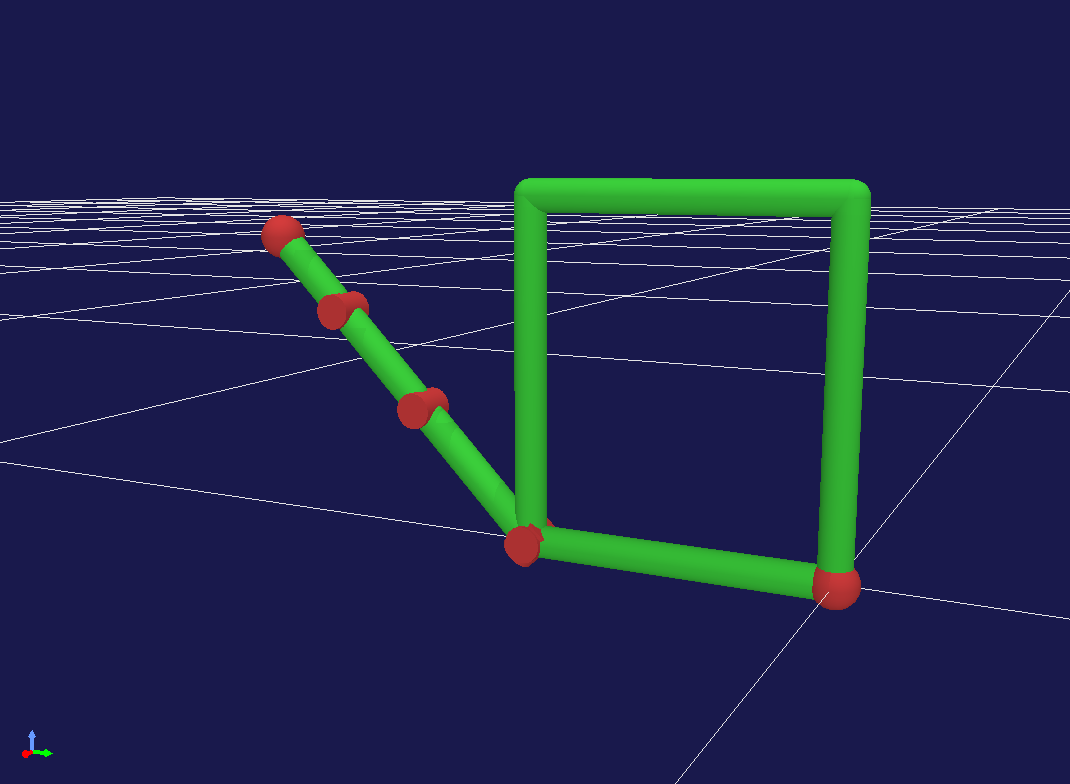

In [19]:
%display

## 指を作る

指を作るcreateFinger関数を設定して、同じ指を位置を変えて作る

In [20]:
def createFinger(rb, baselink, basepos, jid_base=0, base_name='f', l0=0.05, l1=0.05, l2=0.05, fscale=1.0):
    l0 *= fscale
    l1 *= fscale
    l2 *= fscale
    _jid=jid_base
    rb.createJointShape(jointType=Link.JointType.RevoluteJoint).rotate(-PI/2, coordinates.Z).locate(basepos, coordinates.wrt.world)
    rb.makeCylinder(jR, jH, color=jCol).rotate(-PI/2, coordinates.Z).locate(basepos, coordinates.wrt.world)
    lcur=rb.createLinkFromShape(name=base_name+'_0', parentLink=baselink, density=400.0, JointId=_jid, JointRange=[-PI, PI])
    _jid += 1
    #
    linkDir=npa([0., 0., 1.0])
    rb.createJointShape(jointType=Link.JointType.RevoluteJoint).locate(basepos, coordinates.wrt.world)
    rb.makeCylinder(jR, jH, color=jCol).locate(basepos, coordinates.wrt.world)
    rb.makeCapsule(lR, l0-2*lR, color=lCol).rotate(-PI/2, coordinates.X).locate(basepos + l0/2 * linkDir, coordinates.wrt.world)
    lcur=rb.createLinkFromShape(name=base_name+'_1', parentLink=lcur, density=400.0, JointId=_jid, JointRange=[-PI, PI])
    _jid += 1
    #
    basepos += l0 * linkDir
    rb.createJointShape(jointType=Link.JointType.RevoluteJoint).locate(basepos, coordinates.wrt.world)
    rb.makeCylinder(jR, jH, color=jCol).locate(basepos, coordinates.wrt.world)
    rb.makeCapsule(lR, l1-2*lR, color=lCol).rotate(-PI/2, coordinates.X).locate(basepos + l1/2 * linkDir, coordinates.wrt.world)
    lcur=rb.createLinkFromShape(name=base_name+'_2', parentLink=lcur, density=400.0, JointId=_jid, JointRange=[-PI, PI])
    _jid += 1
    #
    basepos += l1 * linkDir
    rb.createJointShape(jointType=Link.JointType.RevoluteJoint).locate(basepos, coordinates.wrt.world)
    rb.makeCylinder(jR, jH, color=jCol).locate(basepos, coordinates.wrt.world)
    rb.makeCapsule(lR, l2-2*lR, color=lCol).rotate(-PI/2, coordinates.X).locate(basepos + l2/2 * linkDir, coordinates.wrt.world)
    rb.makeSphere(tipR, color=jCol).locate(basepos + l2 * linkDir)## TIP
    lcur=rb.createLinkFromShape(name=base_name+'_3', parentLink=lcur, density=400.0, JointId=_jid, JointRange=[-PI, PI])
    _jid += 1
    return _jid

位置を変えて指関節を作る

In [21]:
jid=createFinger(rb, lroot, npa([0, -palm_y + palm_y/3*0, palm_z]), jid_base=jid, base_name='finger0', l0=fg_l0, l1=fg_l1, l2=fg_l2)
jid=createFinger(rb, lroot, npa([0, -palm_y + palm_y/3*1, palm_z]), jid_base=jid, base_name='finger1', l0=fg_l0, l1=fg_l1, l2=fg_l2)
jid=createFinger(rb, lroot, npa([0, -palm_y + palm_y/3*2, palm_z]), jid_base=jid, base_name='finger2', l0=fg_l0, l1=fg_l1, l2=fg_l2)
jid=createFinger(rb, lroot, npa([0, -palm_y + palm_y/3*3, palm_z]), jid_base=jid, base_name='finger3', l0=fg_l0, l1=fg_l1, l2=fg_l2)

In [22]:
rb.draw.viewAll()

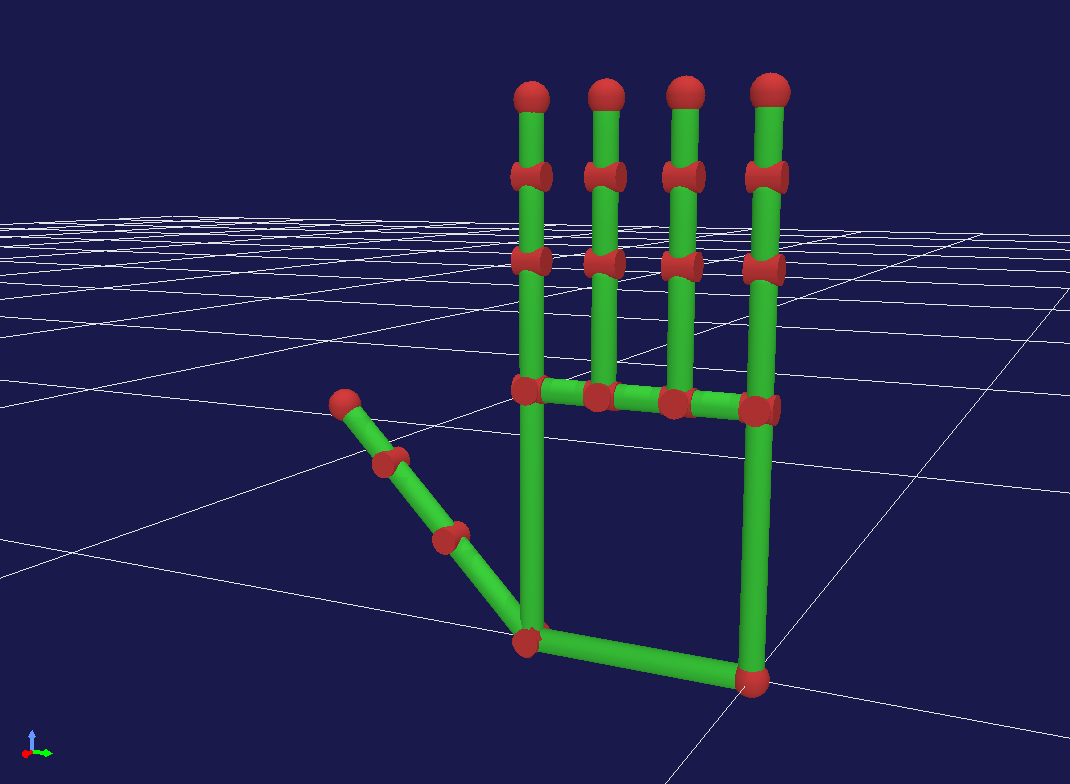

In [23]:
%display

## モデルの保存

In [19]:
rb.writeBodyFile('SimpleHand.body', modelName='SimpleHand')

True